In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
def get_data(name):
    s = np.loadtxt("../files/"+name+".txt", delimiter=",")
    s = s.reshape(-1,1)
    s = np.sign(s)
    return s

def visalize_image(data, title="", size=(90,100)):
    if data.shape[1] == 1:
        data = data.reshape(size)
    plt.figure(figsize=[6,6])
    if title:
        plt.title(title)
    plt.imshow(data, cmap='gray')
    plt.show()

def visalize_image_patch(image, patch, title="", size=(90,100)):
    if image.shape[1] == 1:
        image = image.reshape(size)
    if patch.shape[1] == 1:
        patch = patch.reshape(size)
    
    plt.figure(figsize=[15,6])
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(title+" - Full Image")
    plt.subplot(1, 2, 2)
    plt.imshow(patch, cmap='gray')
    plt.title(title+" - Patch")
    plt.show()
    
def visalize_image_reconstruction(image, patch_before, patch_after, title="", size=(90,100)):
    if image.shape[1] == 1:
        image = image.reshape(size)
    if patch_before.shape[1] == 1:
        patch_before = patch_before.reshape(size)
    if patch_after.shape[1] == 1:
        patch_after = patch_after.reshape(size)
    
    plt.figure(figsize=[15,4])
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title(title+" - Full Image")
    plt.subplot(1, 3, 2)
    plt.imshow(patch_before, cmap='gray')
    plt.title(title+" - Patch Before")
    plt.subplot(1, 3, 3)
    plt.imshow(patch_after, cmap='gray')
    plt.title(title+" - Patch After")
    plt.show()

def get_patches(data, size=(90,100)):
    data = data.reshape(size)
    min_x = 20
    min_y = 15
    max_x = 45
    max_y = 45
    x = random.randint(0, size[0]-max_x-1)
    y = random.randint(0, size[1]-max_y-1)
    dist_x = random.randint(min_x, max_x)
    dist_y = random.randint(min_y, max_y)
    
    patch = np.zeros(size)
    patch[x:x+dist_x, y:y+dist_y] = data[x:x+dist_x, y:y+dist_y]
    
    patch = patch.reshape(-1,1)
    return patch

def plot_rmse(rmse, title=""):
    plt.figure()
    plt.plot(rmse)
    if title:
        plt.title(title)
    plt.grid(True)
    plt.show()
    
def discrete_hopfield(S, V_new, max_epochs, flag=0, every=10):
    N = S.shape[0]
    W = (1/N)*(S @ S.T)
    
    rmse = []
    
    for i in range(max_epochs):
        V = V_new.copy()
        V_new = np.sign(W @ V)
        
        if flag and i%every==0:
            for j in range(V_new.shape[1]):
                visalize_image_reconstruction(S[:,j].reshape(-1,1), V[:,j].reshape(-1,1), V_new[:,j].reshape(-1,1), title="Epochs:" + str(i) + " " + names[j])

        rmse_new = []
        for j in range(V.shape[1]):
            rmse_new.append(np.linalg.norm(V[:,j]-S[:,j]))
        rmse.append(rmse_new)

    V = V_new.copy()
    rmse_new = []
    for j in range(V.shape[1]):
        rmse_new.append(np.linalg.norm(V[:,j]-S[:,j]))
    rmse.append(rmse_new)
    
    return rmse, V

def continuous_hopfield(S, V_new, max_epochs, lmda=10, flag=0, every=10):
    dt = 0.01
    N = S.shape[0]
    W = (1/N)*(S @ S.T)
    
    rmse = []
    
    U_new = V_new.copy()
    for i in range(max_epochs):
        U = U_new.copy()
        V = V_new.copy()
        
        U_new = U + (-U + W @ V)*dt
        V_new = np.tanh(lmda*U_new)
        
        if flag and i%every==0:
            for j in range(V_new.shape[1]):
                visalize_image_reconstruction(S[:,j].reshape(-1,1), V[:,j].reshape(-1,1), V_new[:,j].reshape(-1,1), title="Epochs:" + str(i) + " " + names[j])

        rmse_new = []
        for j in range(V.shape[1]):
            rmse_new.append(np.linalg.norm(V[:,j]-S[:,j]))
        rmse.append(rmse_new)

    V = V_new.copy()
    rmse_new = []
    for j in range(V.shape[1]):
        rmse_new.append(np.linalg.norm(V[:,j]-S[:,j]))
    rmse.append(rmse_new)
    
    return rmse, V

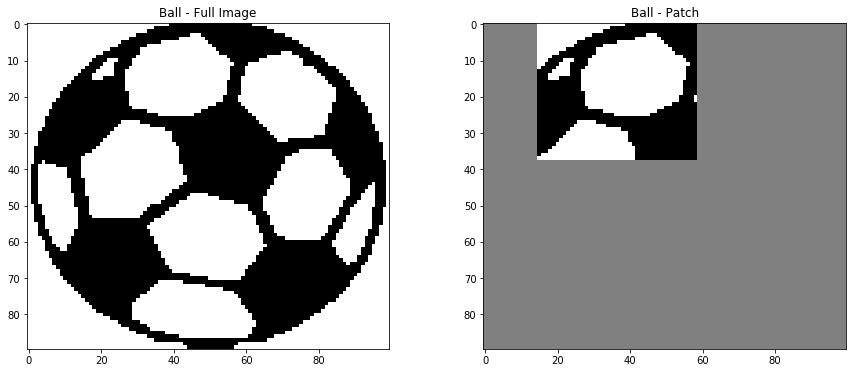

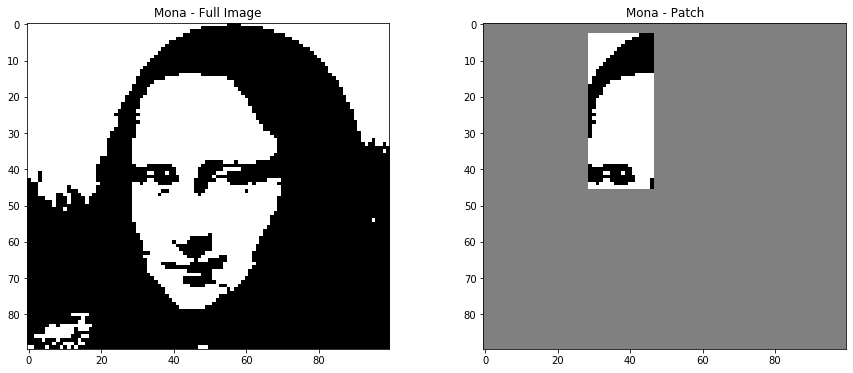

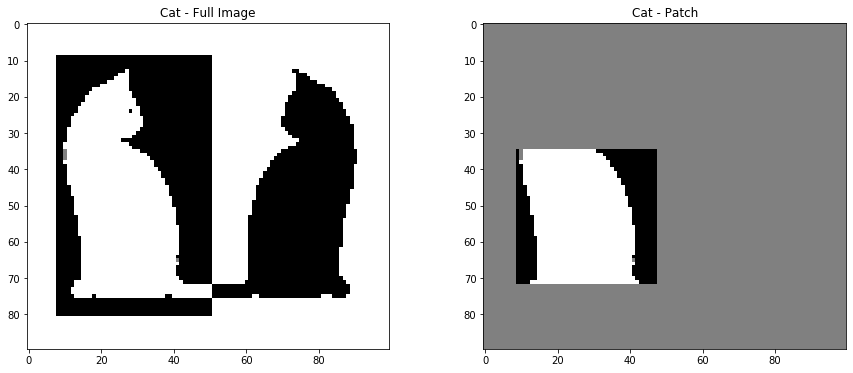

In [3]:
ball = get_data('ball')
mona = get_data('mona')
cat = get_data('cat')

ball_patch = get_patches(ball)
visalize_image_patch(ball, ball_patch, "Ball")

mona_patch = get_patches(mona)
visalize_image_patch(mona, mona_patch, "Mona")

cat_patch = get_patches(cat)
visalize_image_patch(cat, cat_patch, "Cat")

In [9]:
S = np.c_[ball, mona, cat]
V = np.c_[ball_patch, mona_patch, cat_patch]
V_init = V.copy()
V_new = V.copy()

In [10]:
names = ["Ball", "Mona", "Cat"]

for i in range(3):
    print("Initial RMSE - ", names[i], ": ", np.linalg.norm(V[:,i]-S[:,i]), sep="")

Initial RMSE - Ball: 85.60373823613078
Initial RMSE - Mona: 90.69729874698585
Initial RMSE - Cat: 86.93100712634129


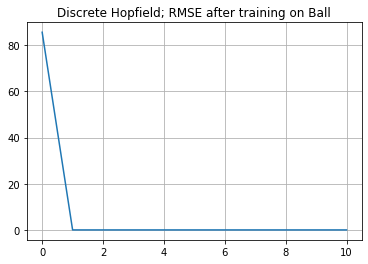

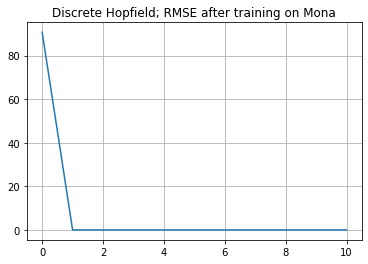

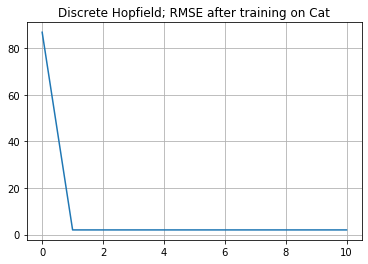

In [11]:
max_epochs = 10
rmse, V_final = discrete_hopfield(S, V_new, max_epochs, flag=0)

rmse = np.array(rmse)
for i in range(rmse.shape[1]):
    plot_rmse(rmse[:,i], title="Discrete Hopfield; RMSE after training on " + names[i])

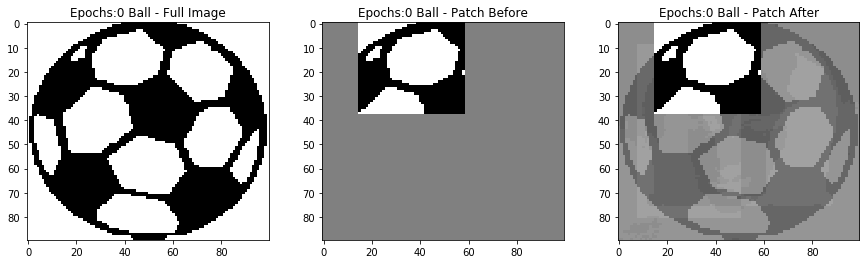

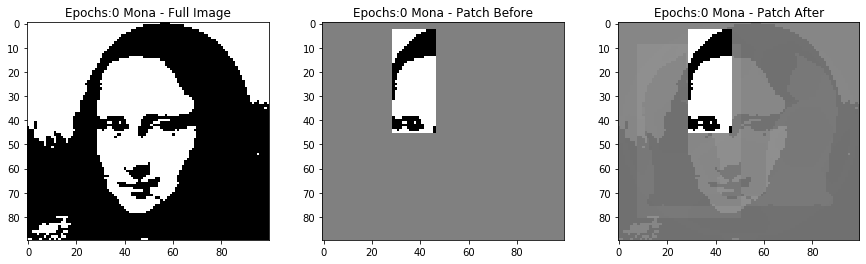

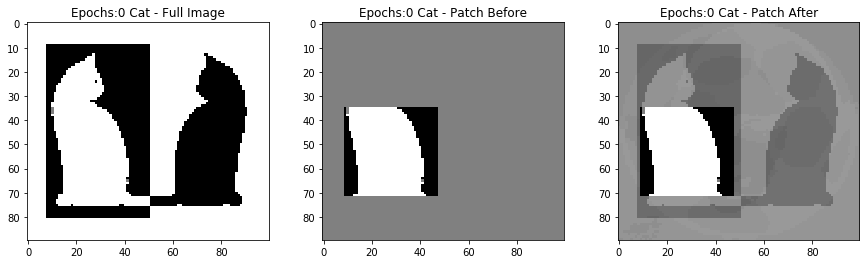

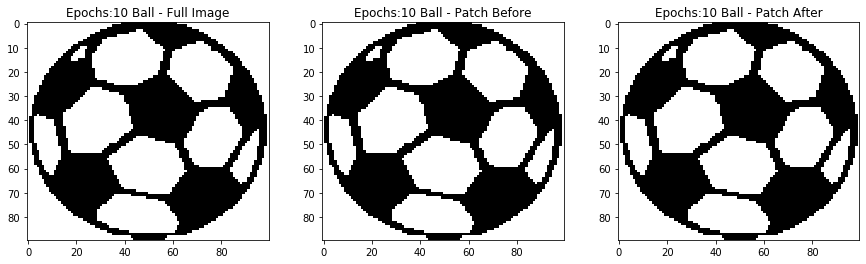

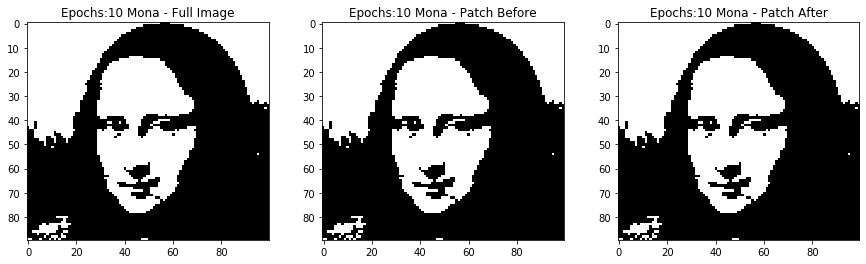

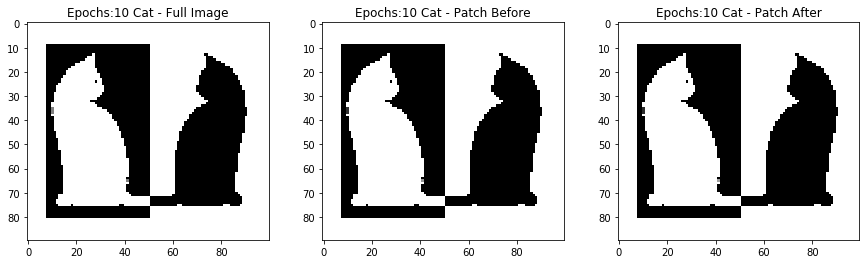

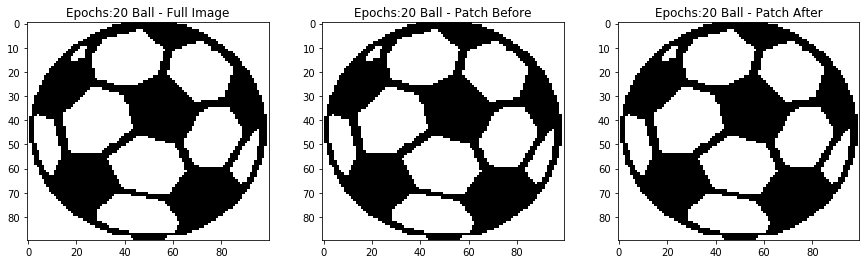

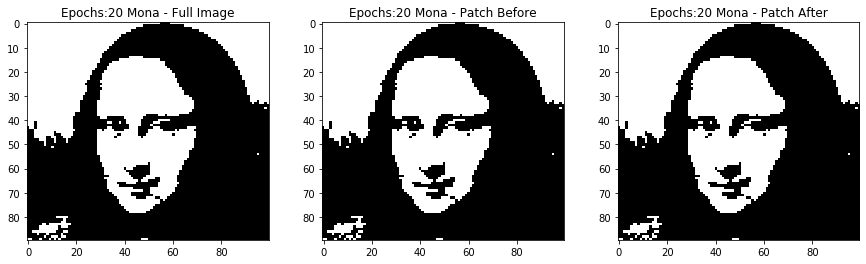

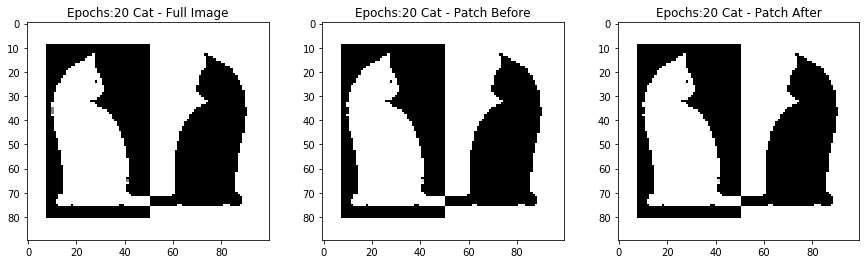

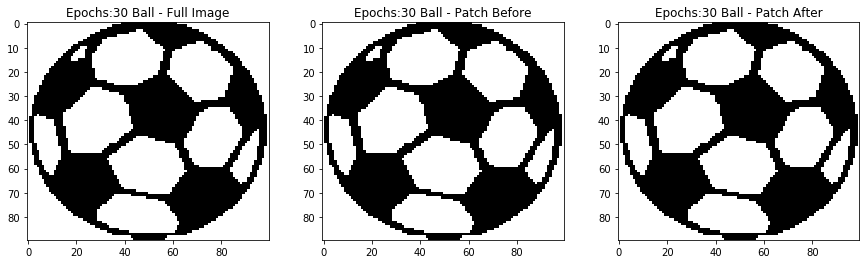

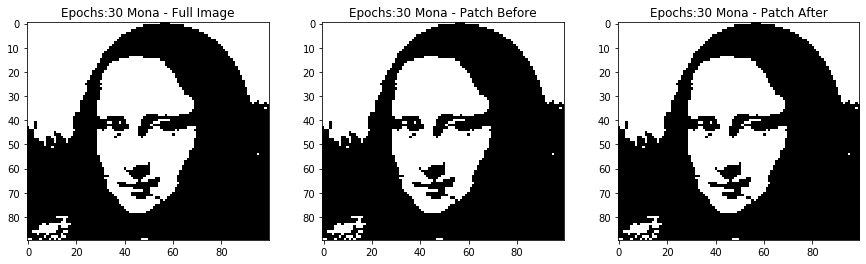

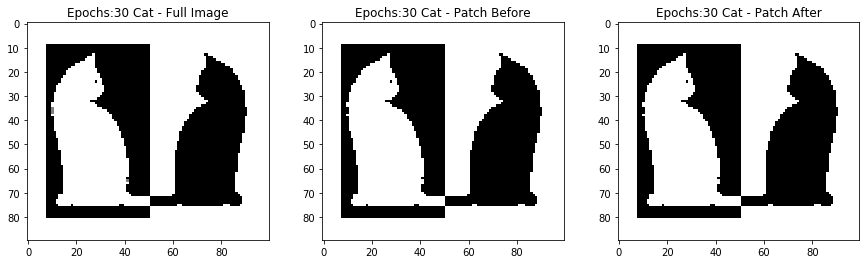

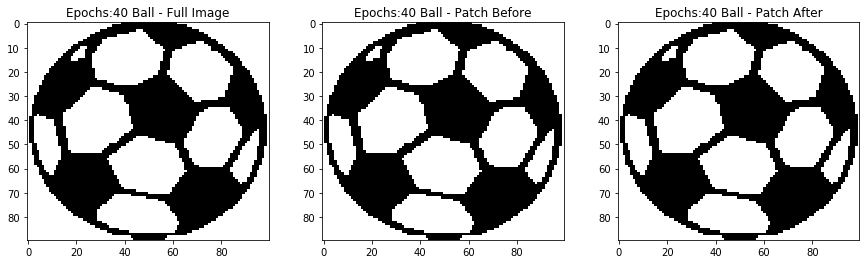

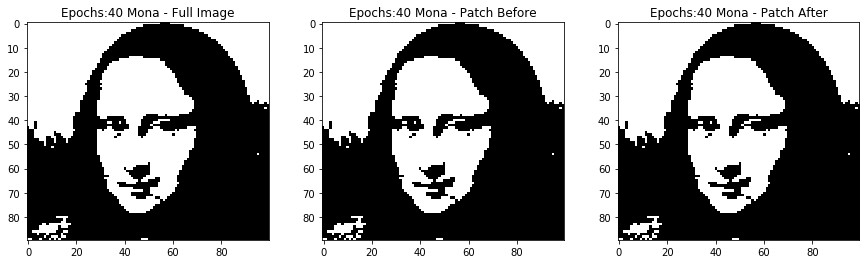

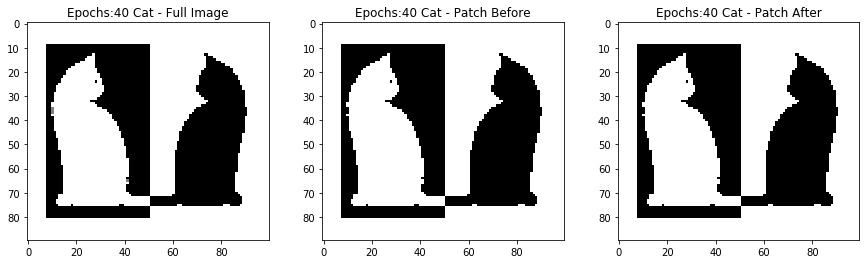

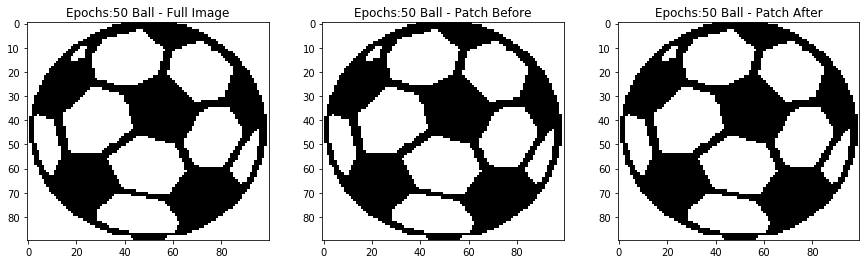

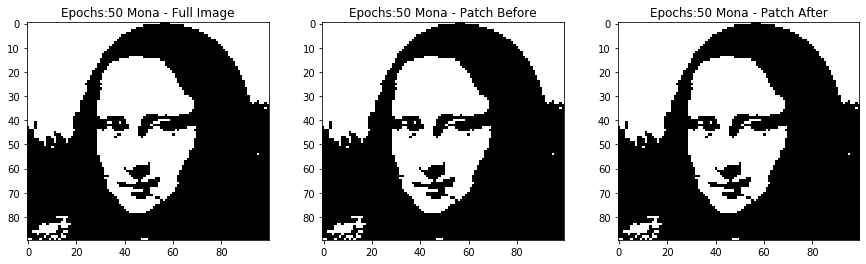

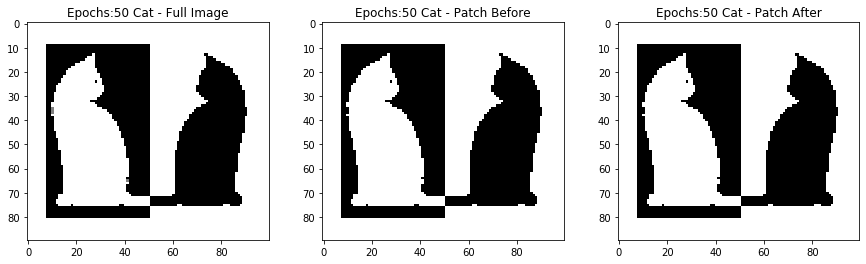

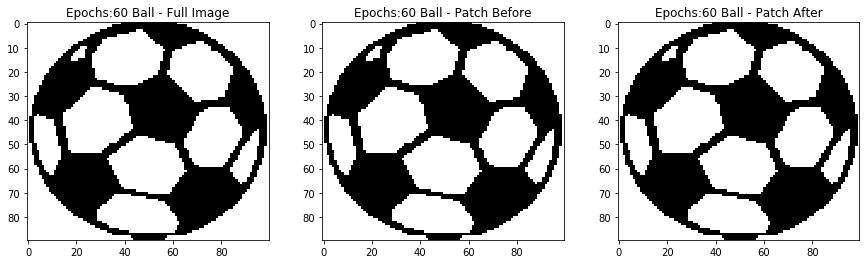

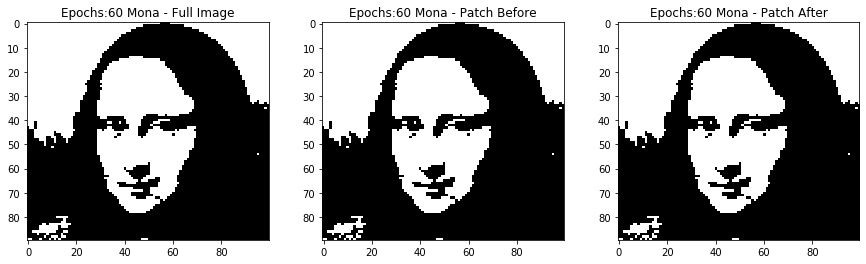

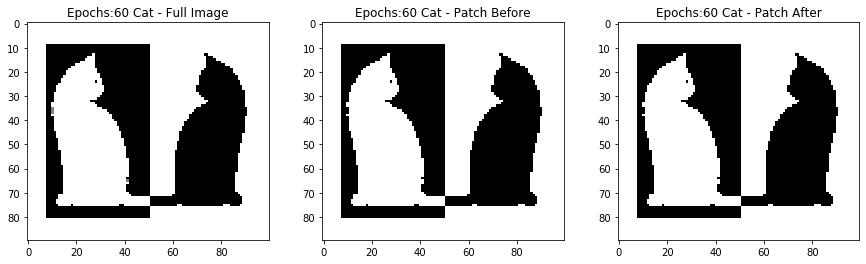

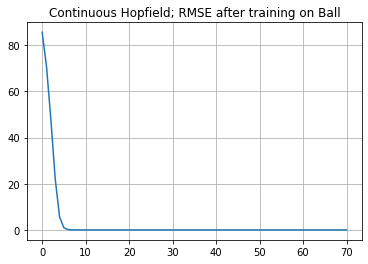

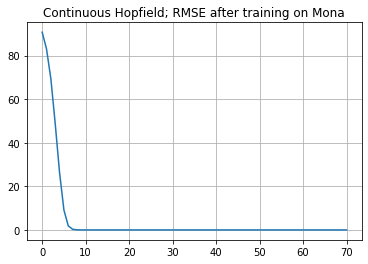

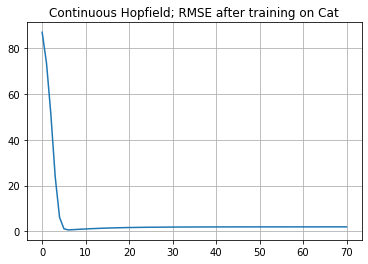

In [21]:
max_epochs = 70
rmse, V_final = continuous_hopfield(S, V_new, max_epochs, lmda=100, flag=1, every=10)

rmse = np.array(rmse)
for i in range(rmse.shape[1]):
    plot_rmse(rmse[:,i], title="Continuous Hopfield; RMSE after training on " + names[i])

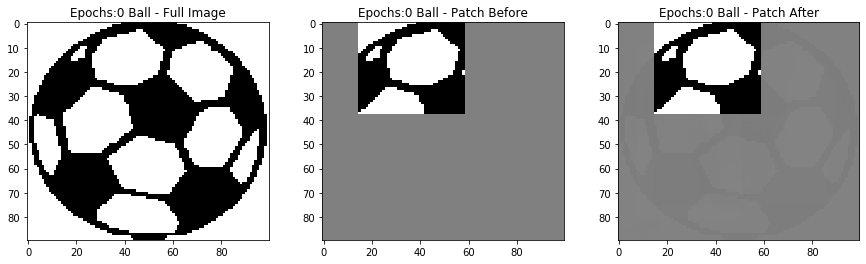

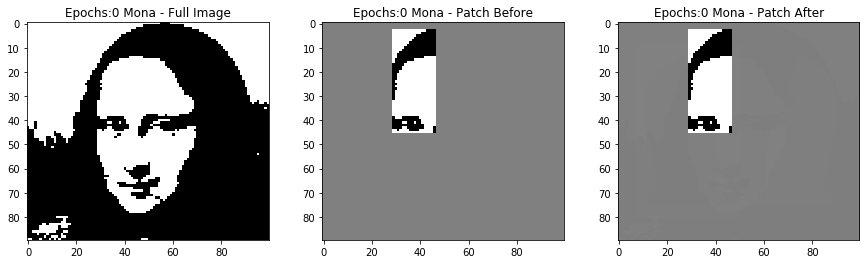

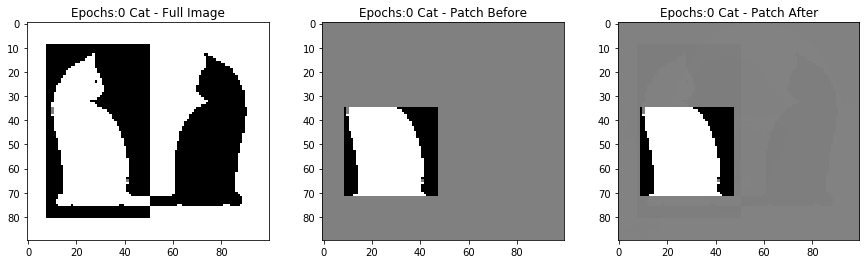

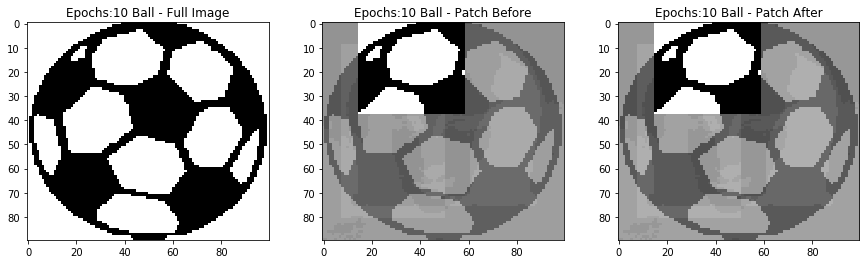

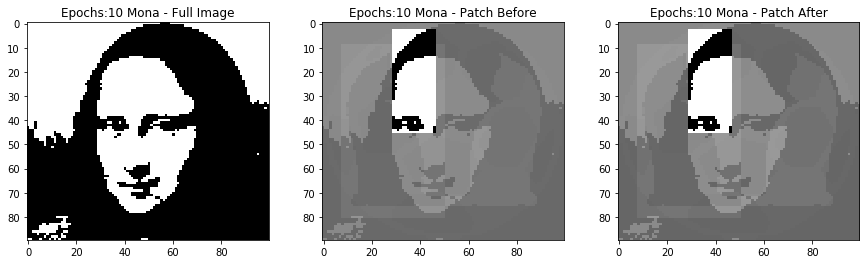

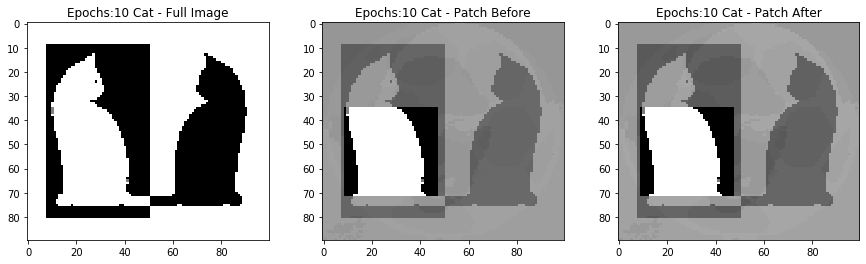

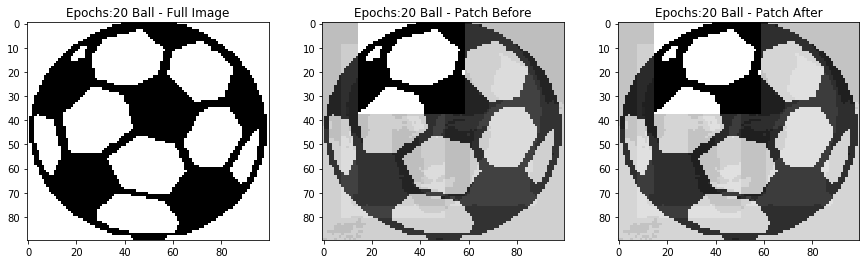

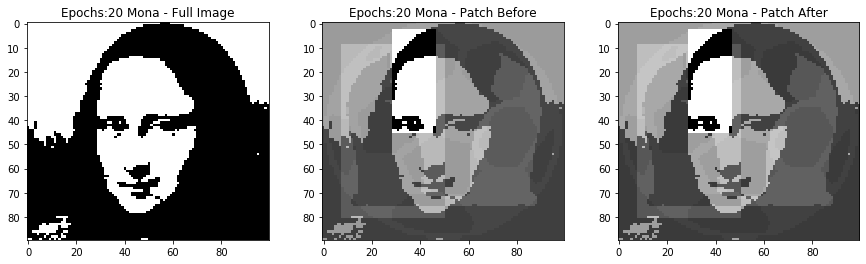

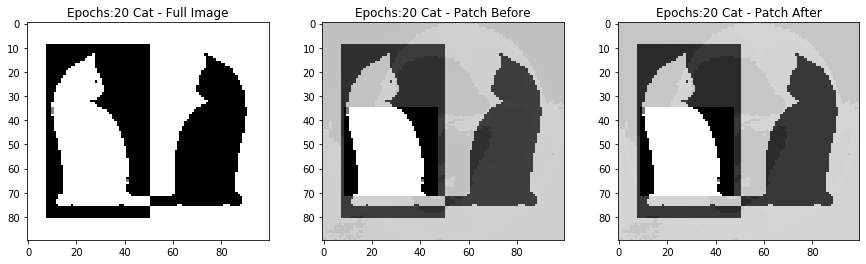

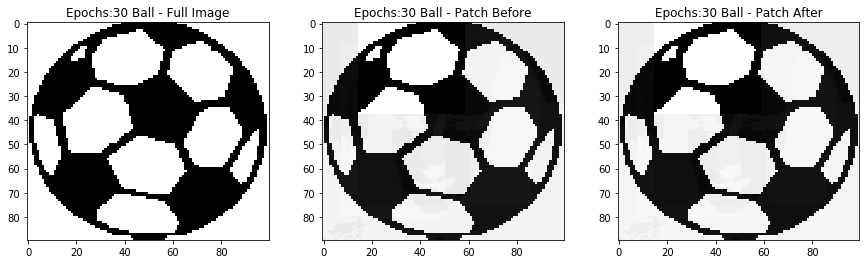

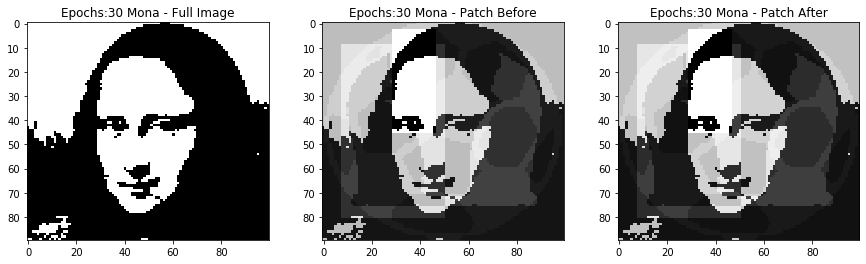

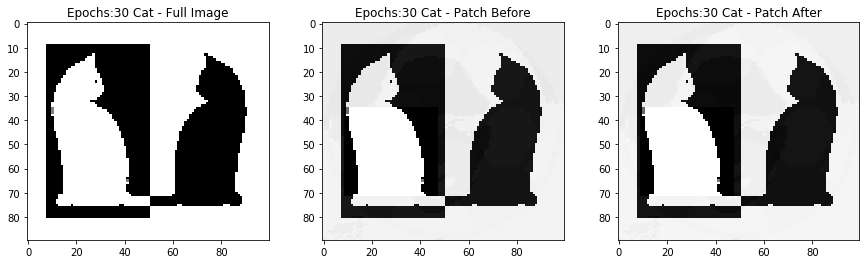

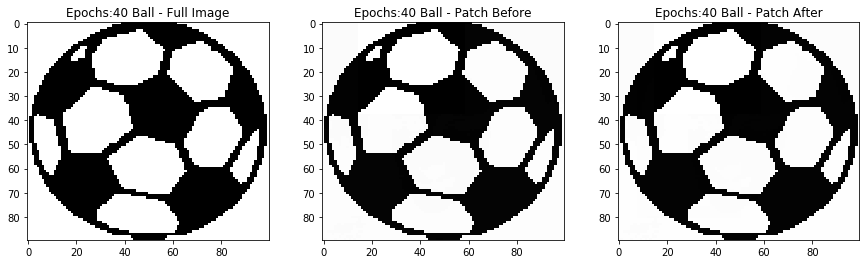

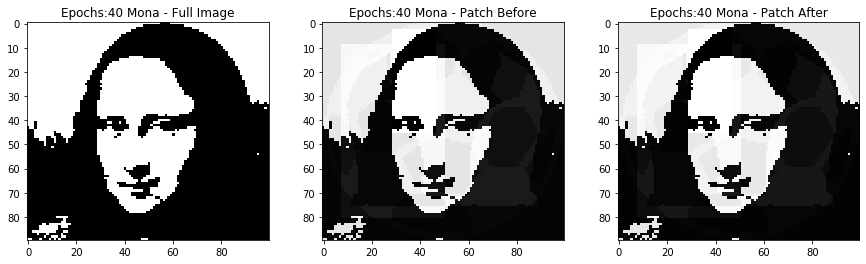

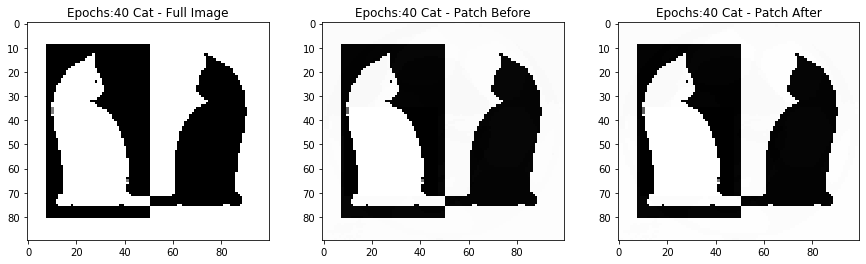

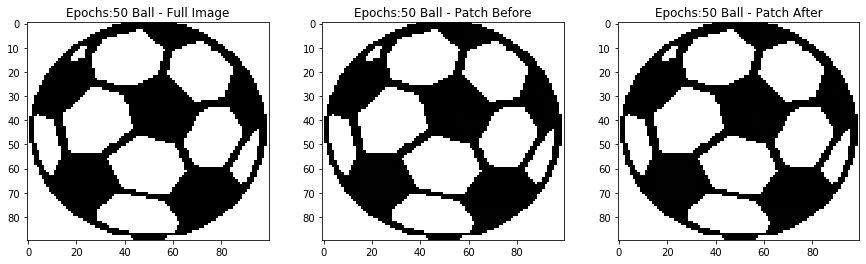

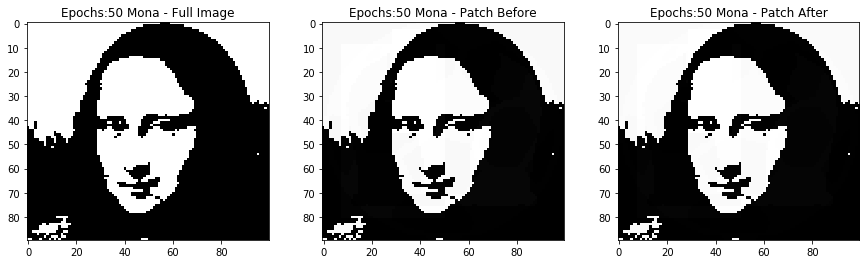

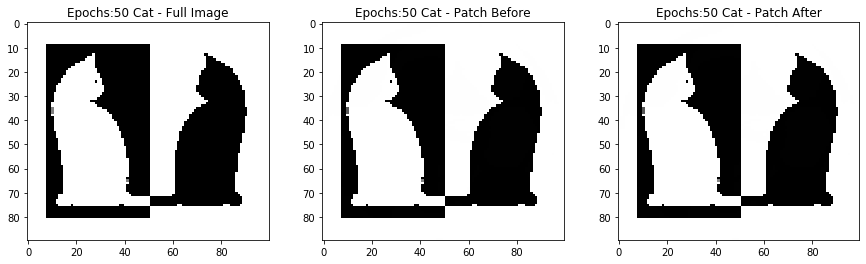

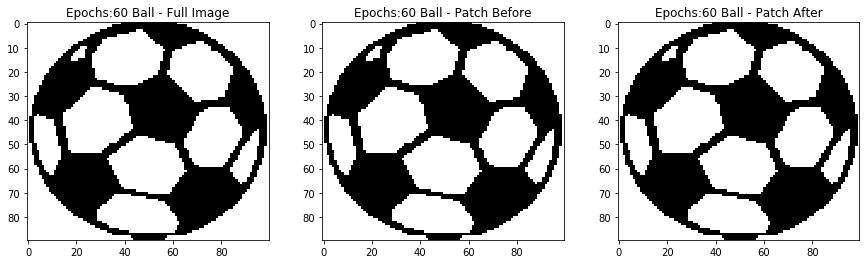

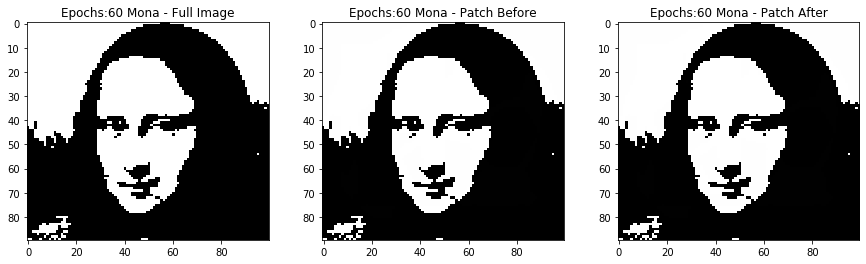

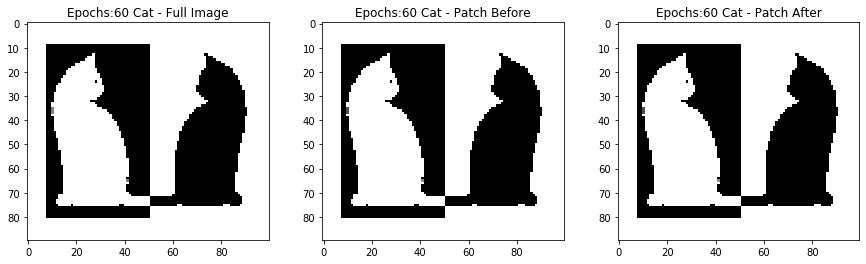

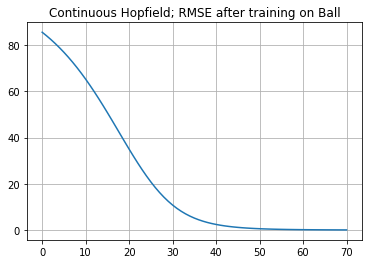

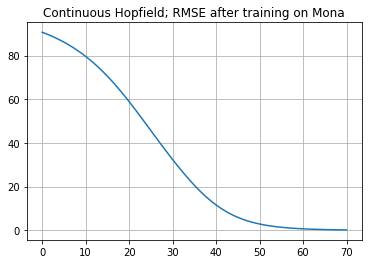

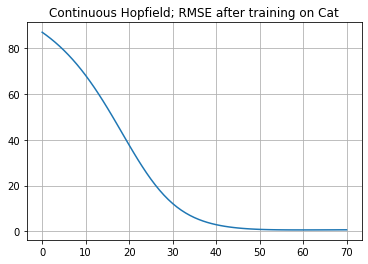

In [23]:
max_epochs = 70
rmse, V_final = continuous_hopfield(S, V_new, max_epochs, lmda=10, flag=1, every=10)

rmse = np.array(rmse)
for i in range(rmse.shape[1]):
    plot_rmse(rmse[:,i], title="Continuous Hopfield; RMSE after training on " + names[i])